<font size="6"> **Exploratory Data Analysis** </font>

In [1]:
%%capture
%run 00_mlmod_load_data.ipynb

# Multicollinearity

In [2]:
alpha_factors = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']
quant_features = ['adv_120d', 'adv_20d', 'dispersion_120d', 'dispersion_20d', 'market_vol_120d', 'market_vol_20d']

In [3]:
all_factors[quant_features].describe().T

,count,mean,std,min,25%,50%,75%,max
adv_120d,361284.0,1.806920e-18,1.000001,-1.728520,-0.866027,0.000000,0.866027,1.728520
adv_20d,361284.0,-5.990031e-19,1.000001,-1.728520,-0.866027,0.000000,0.866027,1.728520
dispersion_120d,361284.0,1.242492e-02,0.000629,0.008892,0.012028,0.012307,0.012706,0.017939
dispersion_20d,361284.0,1.257350e-02,0.001714,0.008892,0.011336,0.012314,0.013554,0.018303
market_vol_120d,361284.0,1.252853e-01,0.019350,0.086119,0.114585,0.120704,0.132684,0.184001
market_vol_20d,361284.0,1.216308e-01,0.043465,0.050347,0.092718,0.112689,0.143227,0.305171


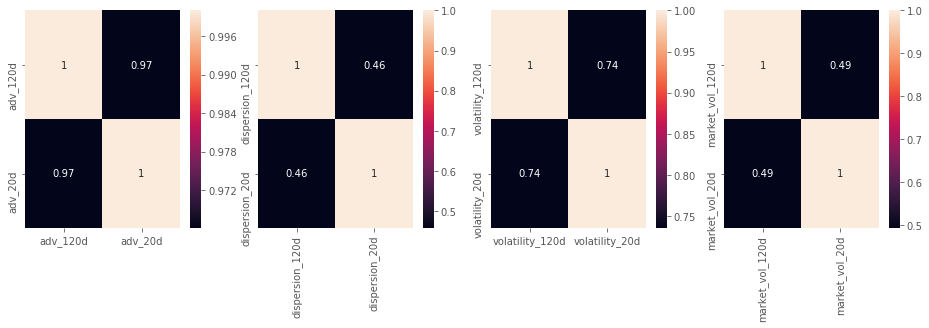

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
ax = axs[0]
sns.heatmap(all_factors[['adv_120d', 'adv_20d']].corr(),annot=True, ax=ax)
ax = axs[1]
sns.heatmap(all_factors[['dispersion_120d', 'dispersion_20d']].corr(),annot=True, ax=ax)
ax = axs[2]
sns.heatmap(all_factors[['volatility_120d', 'volatility_20d']].corr(),annot=True, ax=ax)
ax = axs[3]
sns.heatmap(all_factors[['market_vol_120d', 'market_vol_20d']].corr(),annot=True, ax=ax)

plt.show()

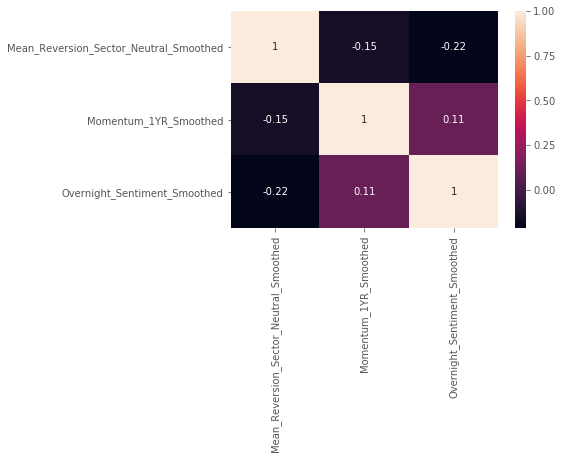

In [5]:
sns.heatmap(all_factors[alpha_factors].corr(),annot=True)
plt.show()

# Predictive Power

In [6]:
all_factors_smp[['is_January',
 'is_December',
 'month_start',
 'month_end',
 'qtr_end',
 'qtr_start']].astype(str).describe()

,is_January,is_December,month_start,month_end,qtr_end,qtr_start
count,72270,72270,72270,72270,72270,72270
unique,2,2,2,2,2,2
top,0,0,0,0,0,0
freq,66435,66210,69274,69046,71334,71375


In [7]:
all_factors_smp.groupby('month_start')[target_col].mean()

month_start
0    0.002739
1    0.002330
Name: target, dtype: float64

In [8]:
all_factors_smp.groupby('month_end')[target_col].mean()

month_end
0    0.002672
1    0.003787
Name: target, dtype: float64

In [9]:
all_factors_smp.groupby('is_January')[target_col].mean()

is_January
0    0.002731
1    0.002617
Name: target, dtype: float64

In [10]:
all_factors_smp.groupby('is_December')[target_col].mean()

is_December
0    0.002930
1    0.000455
Name: target, dtype: float64

In [11]:
all_factors_smp.groupby('qtr_end')[target_col].mean()

qtr_end
0    0.002699
1    0.004468
Name: target, dtype: float64

In [12]:
all_factors_smp.groupby('qtr_start')[target_col].mean()

qtr_start
0    0.002759
1   -0.000181
Name: target, dtype: float64

In [13]:
all_factors_smp.groupby('qtr_1')[target_col].mean()

qtr_1
0    0.002237
1    0.004284
Name: target, dtype: float64

In [14]:
all_factors_smp.groupby('qtr_2')[target_col].mean()

qtr_2
0    0.002815
1    0.002448
Name: target, dtype: float64

In [15]:
all_factors_smp.groupby('qtr_3')[target_col].mean()

qtr_3
0    0.003608
1    0.000139
Name: target, dtype: float64

In [16]:
all_factors_smp.groupby('qtr_4')[target_col].mean()

qtr_4
0    0.002241
1    0.004129
Name: target, dtype: float64

In [17]:
features_full = features_df.columns.tolist()

In [18]:
features = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed',
       'Overnight_Sentiment_Smoothed', 'adv_20d',
       'dispersion_120d', 'dispersion_20d', 'market_vol_120d','market_vol_20d', 'volatility_20d',
       'sector_code_-1', 'sector_code_0', 'sector_code_1', 'sector_code_2',
       'sector_code_3', 'sector_code_4', 'sector_code_5', 'sector_code_6',
       'sector_code_7', 'sector_code_8', 'sector_code_9', 'sector_code_10',
        'is_December', 'qtr_end', 'qtr_start']

In [19]:
features_nov = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed',
 'adv_120d', 'adv_20d',
 'dispersion_120d', 'dispersion_20d',
 'market_vol_120d', 'market_vol_20d',
 'volatility_120d', 'volatility_20d',
 'is_January', 'is_December',
 'month_start', 'month_end',
 'qtr_end', 'qtr_start',
 'sector_code_-1', 'sector_code_0', 'sector_code_1', 'sector_code_2',
 'sector_code_3', 'sector_code_4', 'sector_code_5', 'sector_code_6',
 'sector_code_7', 'sector_code_8', 'sector_code_9', 'sector_code_10',
 'qtr_1', 'qtr_2', 'qtr_3', 'qtr_4']